<img src="img/parties.png" alt="Democratic and Republican Party Logos">

<h1>Women in Congress 1979-2019</h1>

<p>When you begin to look at the demographics of Congress, one of the first things that stands out is that minorities have significantly less representation in comparison to causasion males. Despite this discrepency, a question that I wanted to answer is this: <b>Regarding women in Congress, what is the overall trend? Further, how does that trend break down when we compare political parties over time?</b> This notebook takes a look at the data and attempts to answer these questions.</p>

<h2>Sources:</h2>
<ul>
    <li><a href="https://www.brookings.edu/multi-chapter-report/vital-statistics-on-congress/" target="_blank">Brookings: Vital Statistics on Congress</a></li>
    <li><a href="http://cawp.rutgers.edu/women-us-house-representatives-2019" target="_blank">Rutgers: Women in the U.S. House of Representatives 2019</a></li>
    <li><a href="http://www.cawp.rutgers.edu/women-us-congress-2019" target="_blank">Rutgers: Women in the U.S. Congress 2019</a></li>
</ul>

<h3>Range of study: 1979-2019</h3>

<h2>Library Imports</h2>

<ul>
    <li><a href="https://pandas.pydata.org/" target="_blank">Pandas:</a> Used to convert and perform algorithms on the data presented from a CSV format.</li>
    <li><a href="https://matplotlib.org/" target="_blank">Matplotlib:</a> Used for creating and exporting visualizations.</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

<h2>Custom Functions</h2>

<p>Custom functions for the study will be defined here.</p>

<h3>Pie Chart</h3>
<p>Creates, displays, and saves a pie chart plot customized to a donut plot.</p>
<b>Args:</b>
<ul>
    <li>dem_data: Data Frame containing the Democratic party data.</li>
    <li>rep_data: Data Frame containing the Republican party data.</li>
    <li>title: String containing the plot title.</li>
</ul>
<b>Returns:</b> None

<h3>Bar Chart</h3>
<p>Creates, displays, and saves a bar chart plot of the Women in Congress breakdown over time.</p>
<b>Args:</b>
<ul>
    <li>dem_data: Data Frame containing the Democratic party data.</li>
    <li>rep_data: Data Frame containing the Republican party data.</li>
    <li>title: String containing the plot title.</li>
</ul>
<b>Returns:</b> None

In [21]:
def pie_chart(dem_data, rep_data, title):
    pie_data = [dem_data['Member'].sum(), rep_data['Member'].sum()]
    plt.pie(pie_data, labels=['Democrat: ' + str(dem_data['Member'].sum()), 'Republican: ' + str(rep_data['Member'].sum())], colors=["Blue", "Red"], textprops={'fontsize': 20})
    plt.title(title, fontsize=30)
    plt.axis('equal')
    inner_circle = plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(inner_circle)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.draw()
    fig.savefig('plots/' + title + '.png', dpi=100)
    
def bar_chart(dem_data, rep_data, title):
    times = rep_data['Year']
    senate_r = pd.Series(rep_data['Member'].tolist(), index=times)
    senate_d = pd.Series(dem_data['Member'].tolist(), index=times)
    plot_df = pd.DataFrame({'Republican':senate_r, 'Democrat':senate_d})
    _ = plot_df.plot.bar(color=["Red", "Blue"], width=0.8, rot=0)
    _.set_xlabel("Year")
    _.set_ylabel("Members")
    plt.figtext(.5, .9, title, fontsize=30, ha='center')
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.draw()
    fig.savefig('plots/' + title + '.png', dpi=100)

<h2>Data Import</h2>

<p>The range for this particular study begins with the 1979 Congressional class and extends to the current Congressional class. At the time of this study, the current year was 2019. The year 1979 was selected due to the origins of a meaningful trend. Up until that point, the women elected to congress were rare and did not show any meaningful trend due to the sparcity of women in Congress. The full dataset can be explored <a href="data/women_congress.csv">here</a>, however, any records prior to 1979 are not currently considered.</p>

<p><b>Note:</b> In the data set, if the number of women in Congress for a particular party was zero, it was represented with a period ('.'). These records were replaced with the integer 0.</p>

In [3]:
df = pd.read_csv('data/women_congress.csv').replace('.', 0).sort_values(by='Congress')
df['Member'] = pd.to_numeric(df['Member'])
df = df.loc[df['Year']>=1979]
df.head(10)

,Congress,Year,Chamber,Party,Member
126,96,1979,Senate,D,1
127,96,1979,Senate,R,1
124,96,1979,House,D,11
125,96,1979,House,R,5
131,97,1981,Senate,R,2
130,97,1981,Senate,D,0
128,97,1981,House,D,10
129,97,1981,House,R,9
132,98,1983,House,D,13
133,98,1983,House,R,9


<h2>Data Organization</h2>

<p>The first step in our process, after we select our date range, is to organize the data into usable pieces. For this study, we want to break down the data down by chamber and then by party. Finally, we sum the total number of women in each chamber regardless of their party affiliation</p>

<h3>Senate</h3>
<ul>
    <li><b>women_senate:</b> Data Frame containing each record of the number of women in the Senate, per class, regardless of political affiliation.</li>
    <li><b>tot_women_senate:</b> Integer of all of the women in the Senate from 1979-2019.</li>
    <li><b>women_senate_d:</b> Data Frame containing each record of the number of women in the Senate, per class, who were Democrats.</li>
    <li><b>women_senate_r:</b> Data Frame containing each record of the number of women in the Senate, per class, who were Republicans.</li>
</ul>
<h3>House of Representatives</h3>
<ul>
    <li><b>women_house:</b> Data Frame containing each record of the number of women in the House of Representatives, per class, regardless of political affiliation.</li>
    <li><b>tot_women_house:</b> Integer of all of the women in the House of Representatives from 1979-2019.</li>
    <li><b>women_house_d:</b> Data Frame containing each record of the number of women in the House of Representatives, per class, who were Democrats.</li>
    <li><b>women_house_r:</b> Data Frame containing each record of the number of women in the House of Representatives, per class, who were Republicans.</li>
</ul>

In [4]:
#Senate
women_senate = df.query("Chamber=='Senate'")
tot_women_senate = women_senate['Member'].sum()
women_senate_d = df.query("Chamber=='Senate' & Party=='D'")
women_senate_r = df.query("Chamber=='Senate' & Party=='R'")

#House
women_house = df.query("Chamber=='House'")
tot_women_house = women_house['Member'].sum()
women_house_d = df.query("Chamber=='House' & Party=='D'")
women_house_r = df.query("Chamber=='House' & Party=='R'")

<h2>Introduction - House of Representatives</h2>

<p>It is important to note that these figure does not indicate unique individuals. It is entirely possible that the same woman could hold the same seat for multiple terms. For example, if a woman held a seat for a total of three terms, the data would indicate three seperate instances.</p>

<p>To begin, let's look at the cumulative number of women in House of Representatives.</p>
<ul>
    <li><b>Women have occupied 1107 (12.1%)* House of Representative Seats since 1979.</li>
    <li>Of these 1107 seats, 783 (70.7%) have belonged to the Democrats.</li>
    <li>Of these 1107 seats, 324 (29.2%) have belonged to the Republicans.</li>
</ul>

---

<p style="font-size:80%;">* This was calculated by multiplying the total number of terms in this study (21) by the total number of seats available per term (435 voting members). Then, the total number of seats held by women was divided by the product. Finally, this number was multiplied by 100: (1107 / (435 x 21)) x 100.<p>

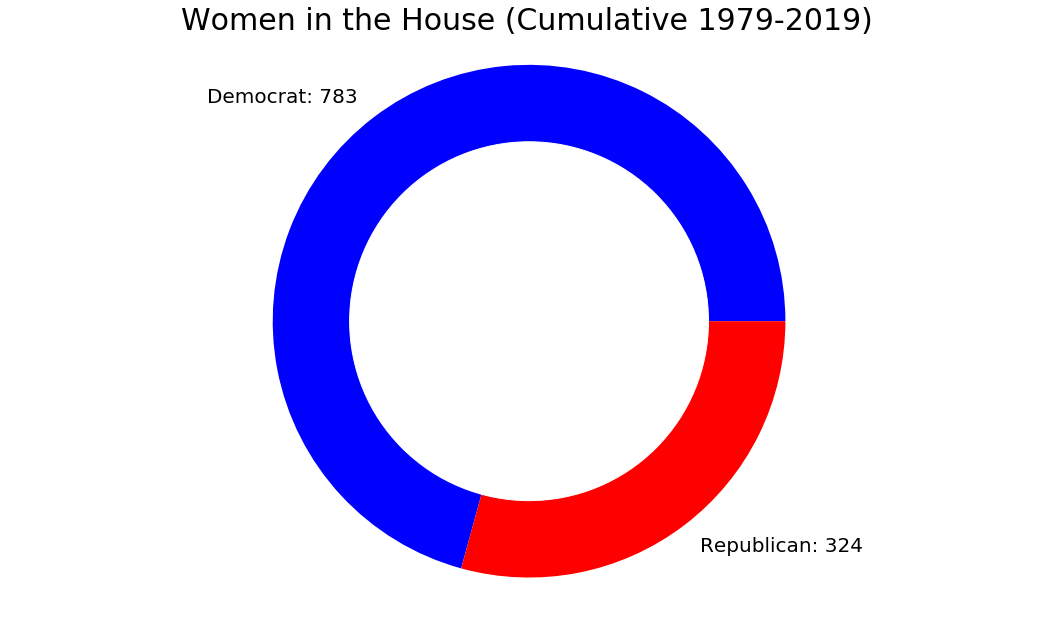

In [5]:
pie_chart(women_house_d, women_house_r, 'Women in the House (Cumulative 1979-2019)')

<h2>Introduction - Senate</h2>

<p>It is important to note that these figure does not indicate unique individuals. It is entirely possible that the same woman could hold the same seat for multiple terms. For example, if a woman held a seat for a total of three terms, the data would indicate three seperate instances.</p>

<ul>
    <li><b>Women have occupied 223 (10.6%)* House of Representative Seats since 1979.</li>
    <li>Of these 223 seats, 153 (68.6%) have belonged to the Democrats.</li>
    <li>Of these 223 seats, 70 (31.4%) have belonged to the Republicans.</li>
</ul>

----

<p style="font-size:80%;">*This figure was calculated by multiplying the total number of terms in this study (21) by the total number of seats available per term (100). Then, the total number of seats held by women was divided by the product. Finally, this number was multiplied by 100: (223 / (100 x 21)) x 100. </p>

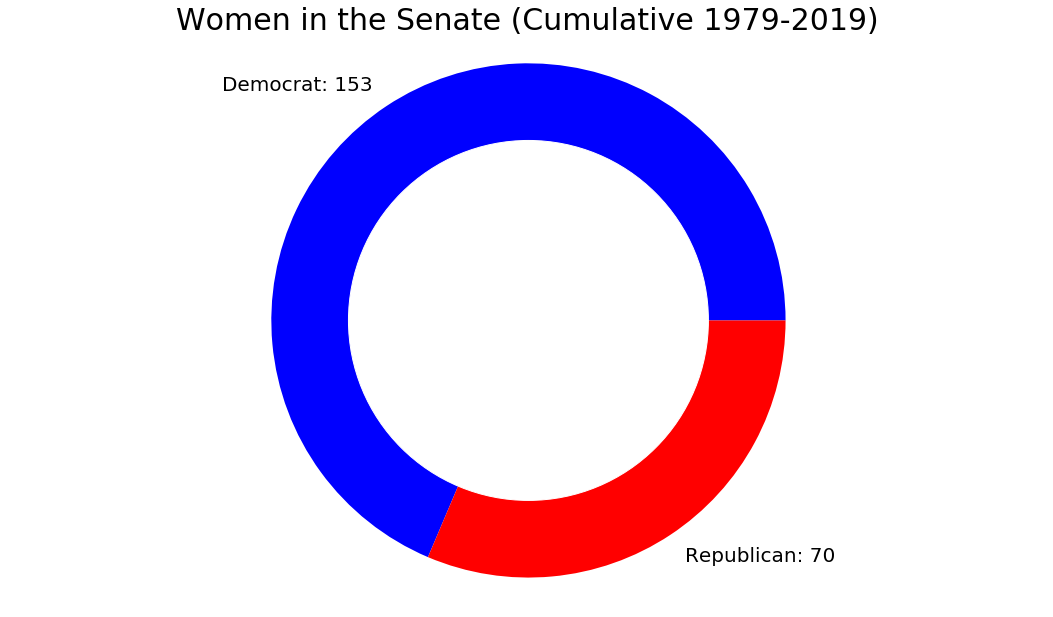

In [6]:
pie_chart(women_senate_d, women_senate_r, 'Women in the Senate (Cumulative 1979-2019)')

<h2>Trend Analysis</h2>

<p>Previously we discussed the statistic that women make up 12.1% and 10.6% of the total seats in the House of Representatives and Senate, respectively, from 1979-2019. This can be a discouraging statistic that can be leveraged into a negative narrative without the proper context. That context being the rate of change over time. When we begin to study this trend the story becomes a bit more optimistic.</p>

<h3>House of Representatives</h3>

<ul>
    <li>In 1979, Women only held 16 seats in the House of Representatives (both parties included). In 2019 they held 102 seats, <b>an increase of 537.5%.</b></li>
    <li>From 2017 to 2019, women of the Democratic party gained 27 seats, a <b>45.5% increase.</b></li>
    <li>Republican women, on the other hand, have been on a decline since it's peak in 2011 <b>(-45.83% when we compare 2011 to 2019)</b>.</li>
</ul>


<h3>Senate</h3>

<ul>
    <li>In 1979, Women only held 2 seats in the Senate when we account for both parties. In 2019 women occupied 25 seats, <b>an increase of 1150%.</b></li>
    <li>Women elected to the Senate representing the Democrats have grown from 1 in 1979 to 17 in 2019, <b>an increase of 1600%</b></li>
    <li>Women elected to the Senate representing the Republicans have grown from 1 in 1979 to 8 in 2019, <b>an increase of 700%.</b>
</ul>

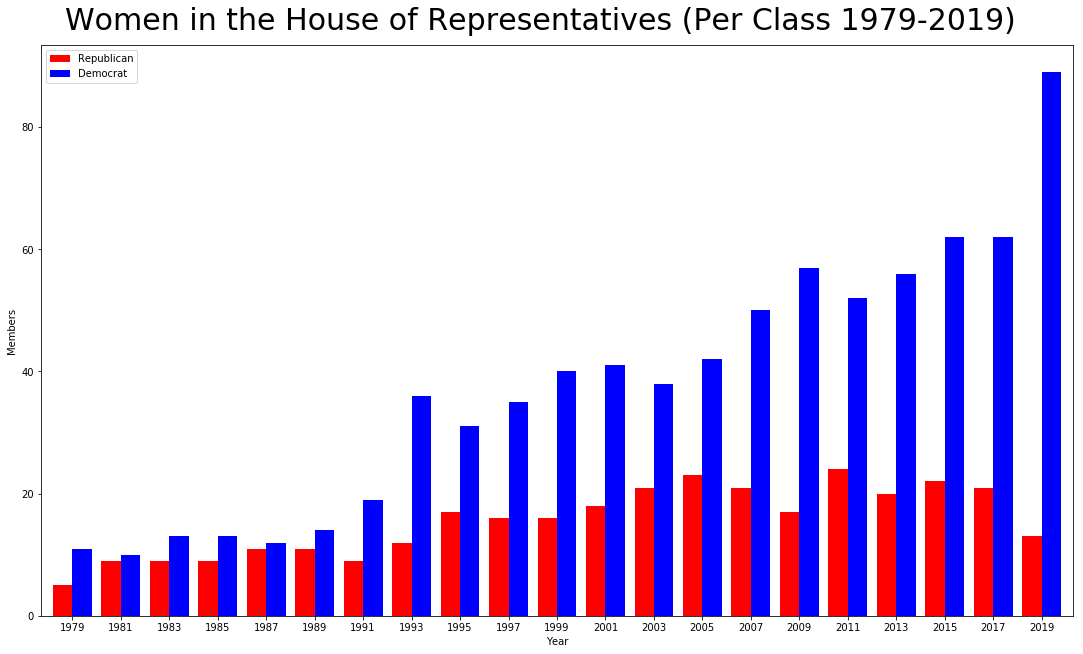

In [22]:
bar_chart(women_house_d, women_house_r, 'Women in the House of Representatives (Per Class 1979-2019)')

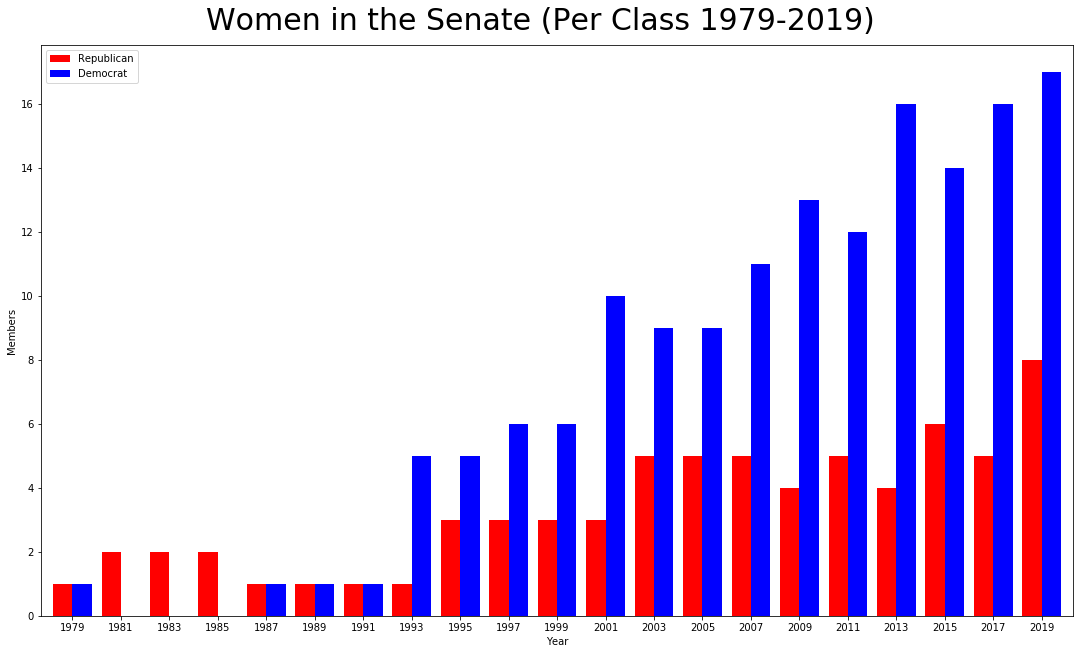

In [23]:
bar_chart(women_senate_d, women_senate_r, 'Women in the Senate (Per Class 1979-2019)')